<a href="https://colab.research.google.com/github/Meegitty/My_ID/blob/main/EV_SOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Replace the filename below with your actual file name
df = pd.read_csv('/content/ev_soc_data.csv')

# Preview the data
df.head()


,Vehicle_ID,Timestamp,Speed_kmh,Acceleration_ms2,Battery_State_%,Battery_Voltage_V,Battery_Temperature_C,Driving_Mode,Road_Type,Traffic_Condition,Slope_%,Weather_Condition,Temperature_C,Humidity_%,Wind_Speed_ms,Tire_Pressure_psi,Vehicle_Weight_kg,Distance_Travelled_km,Energy_Consumption_kWh
0,1102,2024-01-01 00:00:00,111.507366,-2.773816,30.415148,378.091525,25.314786,2,1,1,6.879446,4,0.741770,42.172533,7.829253,31.112020,1822.967368,20.757508,12.054317
1,1435,2024-01-01 00:01:00,48.612323,-0.796982,97.385534,392.718377,18.240755,1,2,1,-3.007212,4,-3.495516,57.018427,4.495572,31.504366,2091.831914,0.642918,4.488701
2,1860,2024-01-01 00:02:00,108.733320,0.253800,84.912600,398.993495,44.449145,1,1,3,0.029585,1,9.248275,69.028911,5.144489,33.838015,1816.702497,40.842824,11.701377
3,1270,2024-01-01 00:03:00,38.579484,-2.111395,28.777904,358.128273,28.980155,1,2,2,8.271943,3,2.868409,86.638349,4.518283,33.256014,1283.102642,5.305229,7.389266
4,1106,2024-01-01 00:04:00,57.172438,1.477883,29.740160,310.888162,33.184551,2,1,1,2.776814,2,16.750244,27.189185,4.263406,33.579678,2160.350788,5.825926,6.761205


In [2]:
# Check structure and columns
df.info()

# See all column names
print(df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Vehicle_ID              5000 non-null   int64  
 1   Timestamp               5000 non-null   object 
 2   Speed_kmh               5000 non-null   float64
 3   Acceleration_ms2        5000 non-null   float64
 4   Battery_State_%         5000 non-null   float64
 5   Battery_Voltage_V       5000 non-null   float64
 6   Battery_Temperature_C   5000 non-null   float64
 7   Driving_Mode            5000 non-null   int64  
 8   Road_Type               5000 non-null   int64  
 9   Traffic_Condition       5000 non-null   int64  
 10  Slope_%                 5000 non-null   float64
 11  Weather_Condition       5000 non-null   int64  
 12  Temperature_C           5000 non-null   float64
 13  Humidity_%              5000 non-null   float64
 14  Wind_Speed_ms           5000 non-null   

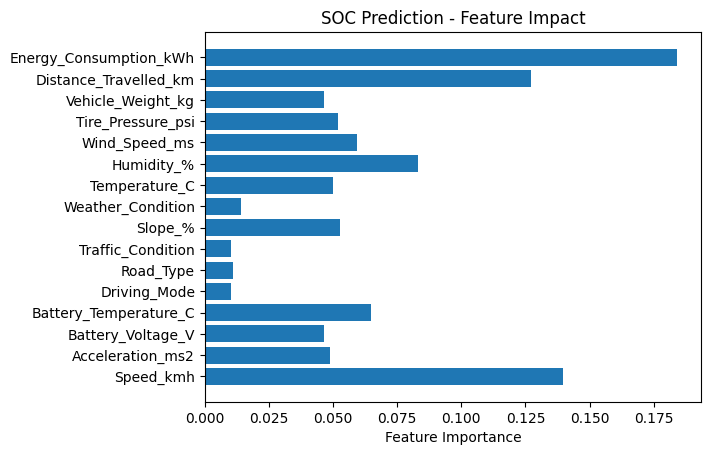

In [7]:
features = [
    'Speed_kmh', 'Acceleration_ms2', 'Battery_Voltage_V', 'Battery_Temperature_C',
    'Driving_Mode', 'Road_Type', 'Traffic_Condition', 'Slope_%',
    'Weather_Condition', 'Temperature_C', 'Humidity_%', 'Wind_Speed_ms',
    'Tire_Pressure_psi', 'Vehicle_Weight_kg', 'Distance_Travelled_km',
    'Energy_Consumption_kWh'
]
X = df[features]
y = df['Battery_State_%']
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

importance = model.feature_importances_
plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.title("SOC Prediction - Feature Impact")
plt.show()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [5]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 16.20593600322693
R² Score: 0.26932301416184223


In [6]:
import pandas as pd

new_trip = pd.DataFrame([{
    'Speed_kmh': 60,
    'Acceleration_ms2': 0.3,
    'Battery_Voltage_V': 380,
    'Battery_Temperature_C': 35,
    'Driving_Mode': 2,
    'Road_Type': 1,
    'Traffic_Condition': 2,
    'Slope_%': 5,
    'Weather_Condition': 1,
    'Temperature_C': 32,
    'Humidity_%': 60,
    'Wind_Speed_ms': 2,
    'Tire_Pressure_psi': 32,
    'Vehicle_Weight_kg': 1800,
    'Distance_Travelled_km': 12,
    'Energy_Consumption_kWh': 5.2
}])

soc_prediction = model.predict(new_trip)
print(f"Predicted SOC: {soc_prediction[0]:.2f}%")


Predicted SOC: 81.77%


In [8]:
# Pick sample rows (you can change the index range)
sample = df.iloc[10:15].copy()

# Show original rows
sample[['Battery_State_%'] + features]


,Battery_State_%,Speed_kmh,Acceleration_ms2,Battery_Voltage_V,Battery_Temperature_C,Driving_Mode,Road_Type,Traffic_Condition,Slope_%,Weather_Condition,Temperature_C,Humidity_%,Wind_Speed_ms,Tire_Pressure_psi,Vehicle_Weight_kg,Distance_Travelled_km,Energy_Consumption_kWh
10,28.086119,77.738094,1.232980,373.103576,28.118928,3,3,2,4.128122,3,25.622610,59.247936,3.025775,28.210929,1260.226303,2.809282,9.355296
11,84.153631,14.750481,1.030676,350.116663,30.720104,1,2,3,-1.035853,2,29.695743,81.830184,11.208778,34.407205,2490.977504,43.027760,6.935743
12,93.206141,106.639090,-0.633953,336.889794,36.908408,1,1,2,3.449694,1,32.610314,31.264704,5.443021,34.708896,2086.712294,16.396273,9.893372
13,80.527515,60.370074,-2.992293,310.561705,13.162941,2,2,3,5.628426,2,24.651493,35.070043,8.540258,28.587573,2459.686505,30.369706,8.731184
14,85.793785,53.921969,-2.279044,373.224025,37.190587,2,2,2,3.773281,3,9.860940,66.957645,3.001859,31.728387,2068.691154,0.699055,7.207605


In [10]:
# Input features only (drop the target column)
sample_inputs = sample[features]

# Ground truth SOC
actual_soc = sample['Battery_State_%']
predicted_soc = model.predict(sample_inputs)


In [11]:
# Combine into a single DataFrame for comparison
comparison = sample_inputs.copy()
comparison['Actual_SOC'] = actual_soc.values
comparison['Predicted_SOC'] = predicted_soc

# Show the comparison
print(comparison[['Actual_SOC', 'Predicted_SOC']])


    Actual_SOC  Predicted_SOC
10   28.086119      30.825104
11   84.153631      77.239666
12   93.206141      65.602411
13   80.527515      73.010454
14   85.793785      73.679140
